# Packages and Functions

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd
import fiona
import rasterio as rio
from fiona.crs import from_epsg
from shapely.geometry import Point, LineString, Polygon
from rasterio.transform import Affine

from io import StringIO

import os
os.getcwd()

'c:\\Users\\gilramolete\\OneDrive - UNIONBANK of the Philippines\\Documents 1\\Python and ML Learnings with AI COE\\Spatial Programming & Remote Sensing'

# Spatial Data

## Vector vs. Raster Data

To work in a GIS environment, real world observations (objects or events that can be recorded in 2D or 3D space) need to be reduced to spatial entities. These spatial entities can be represented in a GIS as a **vector data model** or a **raster data model**.

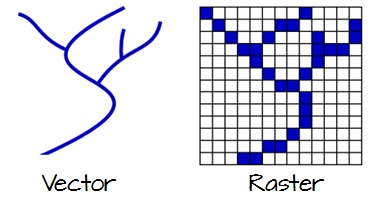

## Vector Data

Vector features can be decomposed into three different geometric primitives: **points, polylines** and **polygons**.

### Point

In [8]:
d = {'name': ['Washington\n(38.90, -77.03)', 'Baltimore\n(39.29, -76.61)','Fredrick\n(39.41,-77.40)'], 
     'geometry': [Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)]}

gdf = gpd.GeoDataFrame(d)
print(gdf)

                          name                    geometry
0  Washington\n(38.90, -77.03)  POINT (-77.03687 38.90719)
1   Baltimore\n(39.29, -76.61)  POINT (-76.61219 39.29039)
2     Fredrick\n(39.41,-77.40)  POINT (-77.40846 39.41201)


A point is composed of one coordinate pair representing a specific location in a coordinate system. Points are the most basic geometric primitives having no length or area. By definition a point can’t be “seen” since it has no area; but this is not practical if such primitives are to be mapped. So points on a map are represented using symbols that have both area and shape (e.g. circle, square, plus signs).

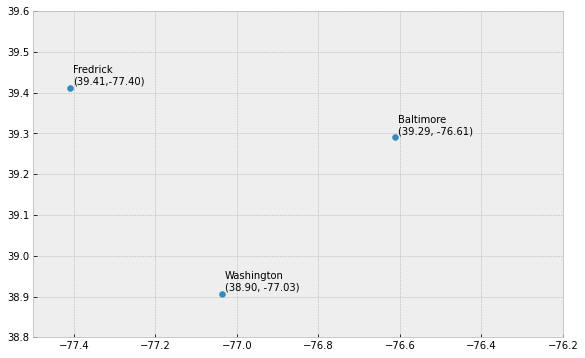

In [9]:
plt.style.use('bmh') # better for plotting geometries vs general plots.

fig, ax = plt.subplots(figsize = (12, 6))
gdf.plot(ax = ax)
plt.ylim([38.8, 39.6])
plt.xlim([-77.5, -76.2])

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.name):
    ax.annotate(label, xy = (x, y), xytext = (3, 3), textcoords="offset points")
plt.show()

We seem capable of interpreting such symbols as points, but there may be instances when such interpretation may be ambiguous (e.g. is a round symbol delineating the area of a round feature on the ground such as a large oil storage tank or is it representing the point location of that tank?).

### Polyline

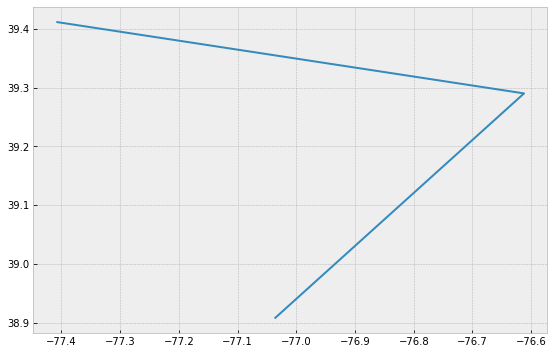

In [10]:
d = {'name': ['Washington\n(38.90, -77.03)' ], 
     'geometry': [LineString([Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)])]}
gdf = gpd.GeoDataFrame(d)

fig, ax = plt.subplots(figsize = (12, 6))
gdf.plot(ax = ax)
plt.show()

A polyline is composed of a sequence of two or more coordinate pairs called vertices. A vertex is defined by coordinate pairs, just like a point, but what differentiates a vertex from a point is its explicitly defined relationship with neighboring vertices. A vertex is connected to at least one other vertex.

Like a point, a true line can’t be seen since it has no area. And like a point, a line is symbolized using shapes that have a color, width and style (e.g. solid, dashed, dotted, etc…). Roads and rivers are commonly stored as polylines in a GIS.

### Polygon

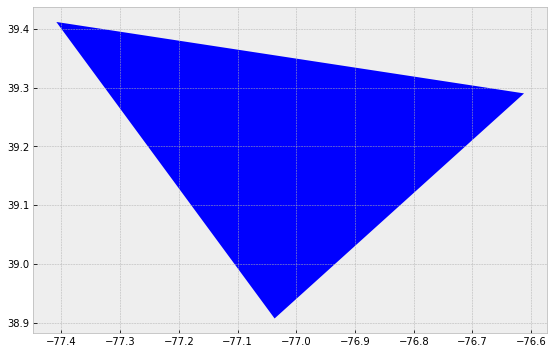

In [29]:
coords = (Point(-77.036873, 38.907192),
          Point(-76.612190, 39.290386),
          Point(-77.408456, 39.412006))
d = {'name': ['Washington\n(38.90, -77.03)'], 
     'geometry': [Polygon([(-77.036873, 38.907192), (-76.612190, 39.290386), (-77.408456, 39.412006)])]
          }

gdf = gpd.GeoDataFrame(d)

fig, ax = plt.subplots(figsize = (12, 6))
gdf.plot(ax = ax)
plt.show()

A polygon is composed of three or more line segments whose starting and ending coordinate pairs are the same. Sometimes you will see the words lattice or area used in lieu of ‘polygon’. Polygons represent both length (i.e. the perimeter of the area) and area. They also embody the idea of an inside and an outside; in fact, the area that a polygon encloses is explicitly defined in a GIS environment. If it isn’t, then you are working with a polyline feature. If this does not seem intuitive, think of three connected lines defining a triangle: they can represent three connected road segments (thus polyline features), or they can represent the grassy strip enclosed by the connected roads (in which case an ‘inside’ is implied thus defining a polygon).

## Raster Data

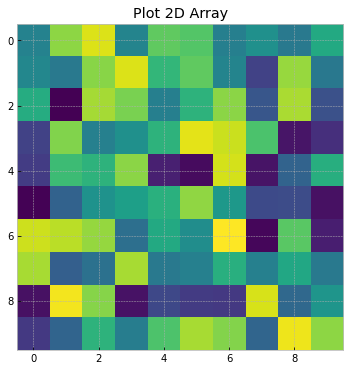

In [31]:
X = np.random.randint(256, size = (10, 10))

fig = plt.figure(figsize = (8, 6))
plt.imshow(X)
plt.title('Plot 2D Array')
plt.show()

A raster data model uses an array of cells, or pixels, to represent real-world objects. Raster datasets are commonly used for representing and managing imagery, surface temperatures, digital elevation models, and numerous other entities.

A raster can be thought of as a special case of an area object where the area is divided into a regular grid of cells. But a regularly spaced array of marked points may be a better analogy since rasters are stored as an array of values where each cell is defined by a single coordinate pair inside of most GIS environments.

Implicit in a raster data model is a value associated with each cell or pixel. This is in contrast to a vector model that may or may not have a value associated with the geometric primitive.

## Object vs. Field

The traditional vector/raster perspective of our world is one that has been driven by software and data storage environments. But this perspective is not particularly helpful if one is interested in analyzing the pattern. In fact, it can mask some important properties of the entity being studied. An object vs. field view of the world proves to be more insightful even though it may seem more abstract.

### Object View

An object view of the world treats entities as discrete objects; they need not occur at every location within a study area. Point locations of cities would be an example of an object. So would be polygonal representations of urban areas which may be non-contiguous.

## Field View

A field view of the world treats entities as a scalar field. This is a mathematical concept in which a scalar is a quantity having a magnitude. It is measurable at every location within the study region. Two popular examples of a scalar field are surface elevation and surface temperature. Each represents a property that can be measured at any location.

Another example of a scalar field is the presence and absence of a building. This is a binary scalar where a value of 0 is assigned to a location devoid of buildings and a value of 1 is assigned to locations having one or more buildings. A field representation of buildings may not seem intuitive, in fact, given the definition of an object view of the world in the last section, it would seem only fitting to view buildings as objects. In fact, buildings can be viewed as both field or objects. The context of the analysis is ultimately what will dictate which view to adopt. If we’re interested in studying the distribution of buildings over a study area, then an object view of the features makes sense. If, on the other hand, we are interested in identifying all locations where buildings don’t exist, then a binary field view of these entities would make sense.

## Scale

How one chooses to represent a real-world entity will be in large part dictated by the **scale** of the analysis. In a GIS, scale has a specific meaning: it’s the ratio of distance on the map to that in the real world. So a **large scale** map implies a relatively large ratio and thus a small extent. This is counter to the layperson’s interpretation of large scale which focuses on the scope or extent of a study; so a large scale analysis would imply one that covers a large area.

The following two maps represent the same entity: the Boston region. At a small scale (e.g. 1:10,000,000), Boston and other cities may be best represented as points. At a large scale (e.g. 1:34,000), Boston may be best represented as a polygon. Note that at this large scale, roads may also be represented as polygon features instead of polylines.

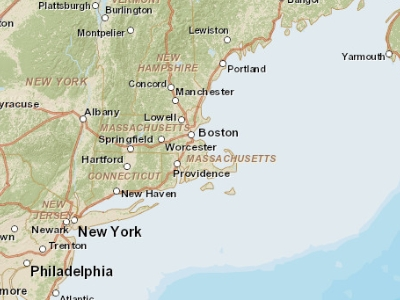

^Map of the Boston area at a 1:10,000,000 scale. Note that in geography, this is considered small scale whereas in layperson terms, this extent is often referred to as a large scale (i.e. covering a large area).

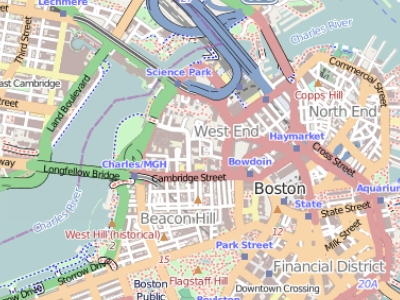

^Map of the Boston area at a 1:34,000 scale. Note that in geography, this is considered large scale whereas in layperson terms, this extent is often referred to as a small scale (i.e. covering a small area).

## Attribute Levels

Non-spatial information associated with a spatial feature is referred to as an **attribute**. A feature on a GIS map is linked to its record in the attribute table by a unique numerical feature identifier (FID). Every feature in a layer has an identifier. It is important to understand the one-to-one or many-to-one relationship between feature, and attribute record. Because features on the map are linked to their records in the table, many GIS software will allow you to click on a map feature and see its related attributes in the table.

Raster data can also have attributes **only if pixels are represented using a small set of unique integer values**. Raster datasets that contain attribute tables typically have cell values that represent or define a class, group, category, or membership. NOTE: not all GIS raster data formats can store attribute information; in fact most raster datasets you will work with in this course will not have attribute tables.

Attribute data can be broken down into four **measurement levels**:
- **Nominal** data which have **no implied order, size or quantitative information** (e.g. paved and unpaved roads)
- **Ordinal** data have an **implied order** (e.g. ranked scores), however, we **cannot quantify the difference** since a linear scale is not implied.
- **Interval** data are **numeric and have a linear scale**, however they **do not have a true zero** and can therefore not be used to measure relative magnitudes. For example, one cannot say that 60°F is twice as warm as 30°F since when presented in degrees °C the temperature values are 15.5°C and -1.1°C respectively (and 15.5 is clearly not twice as big as -1.1).
- **Ratio scale** data are **interval data with a true zero** such as monetary value (e.g. 20, $100)

## Data Type

Another way to categorize an attribute is by its **data type**. ArcGIS supports several data types such as **integer, float, double** and **text**. Knowing your data type and measurement level should dictate how they are stored in a GIS environment. The following table lists popular data types available in most GIS applications.

| Type | Stored values | Note |
| --- | --- | --- |
| Short integer | -32,768 to 32,768 | Whole numbers |
| Long integer | -2,147,483,648 to 2,147,483,648 | Whole numbers |
| Float | -3.4 * E-38 to 1.2 E38 | Real numbers |
| Double | -2.2 * E-308 to 1.8 * E308 | Real numbers |
| Text | Up to 64,000 characters | Letters and words |

While whole numbers can be stored as a float or double (i.e. we can store the number 2 as 2.0) doing so comes at a cost: an increase in storage space. This may not be a big deal if the dataset is small, but if it consists of tens of thousands of records the increase in file size and processing time may become an issue.

While storing an integer value as a float may not have dire consequences, the same cannot be said of storing a float as an integer. For example, if your values consist of 0.2, 0.01, 0.34, 0.1 and 0.876, their integer counterpart would be 0, 0, 0, and 1 (i.e. values rounded to the nearest whole number).

# Data Storage Formats

## Vector Data File Formats

### GeoJSON

GeoJSON is an **open standard format** designed for representing **simple geographical features, along with their non-spatial attributes**. It is based on the JSON format. The features include points, line strings, polygons, and multi-part collections of these types. One of its primary advantages is that it is human readible and stores all the relevant data in a single text file. As result however, these files can get very large when storing complex geometries.

Here’s a simple example of a FeatureCollection that includes a point, line and polygon `geometry` with some attributes stored as `properties`:

In [33]:
  { "type": "FeatureCollection",
    "features": [
      { "type": "Feature",
        "geometry": {"type": "Point", "coordinates": [102.0, 0.5]},
        "properties": {"prop0": "value0"}
        },
      { "type": "Feature",
        "geometry": {
          "type": "LineString",
          "coordinates": [
            [102.0, 0.0], [103.0, 1.0], [104.0, 0.0], [105.0, 1.0]
            ]
          },
        "properties": {
          "prop0": "value0",
          "prop1": 0.0
          }
        },
      { "type": "Feature",
         "geometry": {
           "type": "Polygon",
           "coordinates": [
             [ [100.0, 0.0], [101.0, 0.0], [101.0, 1.0],
               [100.0, 1.0], [100.0, 0.0] ]
             ]
         },
         "properties": {
           "prop0": "value0",
           "prop1": {"this": "that"}
           }
         }
       ]
     }

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [102.0, 0.5]},
   'properties': {'prop0': 'value0'}},
  {'type': 'Feature',
   'geometry': {'type': 'LineString',
    'coordinates': [[102.0, 0.0], [103.0, 1.0], [104.0, 0.0], [105.0, 1.0]]},
   'properties': {'prop0': 'value0', 'prop1': 0.0}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[100.0, 0.0],
      [101.0, 0.0],
      [101.0, 1.0],
      [100.0, 1.0],
      [100.0, 0.0]]]},
   'properties': {'prop0': 'value0', 'prop1': {'this': 'that'}}}]}

### GeoPackage

This is a relatively new data format that follows open format standards (i.e. it is non-proprietary). It’s built on top of SQLite (a self-contained relational database). Its one big advantage over many other vector formats is its **compactness–coordinate value, metadata, attribute table, projection information, etc…**, are all stored in a single file which facilitates portability. Its filename usually ends in `.gpkg`. Applications such as QGIS (2.12 and up), R and ArcGIS will recognize this format (ArcGIS version 10.2.2 and above will read the file from ArcCatalog but requires a script to create a GeoPackage).

### Shapefile

A **shapefile** is a file-based data format native to ArcView 3.x software (a much older version of ArcMap). Conceptually, a shapefile is a feature class -– it **stores a collection of features that have the same geometry type** (point, line, or polygon), the **same attributes**, and a common spatial extent.

Despite what its name may imply, a “single” shapefile is actually composed of **at least three files**, and as many as eight. Each file that makes up a “shapefile” has a common filename but different extension type.

The list of files that define a “shapefile” are shown in the following table. Note that each file has a specific role in defining a shapefile.

| File extension | Content |
| --- | --- |
| .dbf | Attribute information |
| .shp | Feature geometry |
| .shx | Feature geometry index |
| .aih | Attribute index |
| .ain | Attribute index |
| .prj | Coordinate system information |
| .sbn | Spatial index file |
| .sbx | Spatial index file |

### File Geodatabase

A file geodatabase is a **relational database storage format**. It’s a far more complex data structure than the shapefile and consists of a `.gdb` folder housing dozens of files. Its complexity renders it more versatile allowing it to **store multiple feature classes** and **enabling topological definitions** (i.e. allowing the user to define rules that govern the way different feature classes relate to one another). An example of the contents of a geodatabase is shown in the following figure.

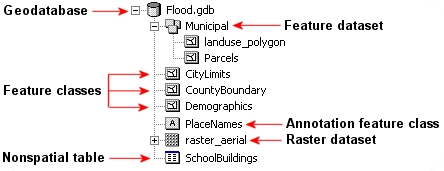

## Raster Data File Formats

Rasters are in part defined by their pixel depth. Pixel depth defines the range of distinct values the raster can store. For example, a 1-bit raster can only store 2 distinct values: 0 and 1.

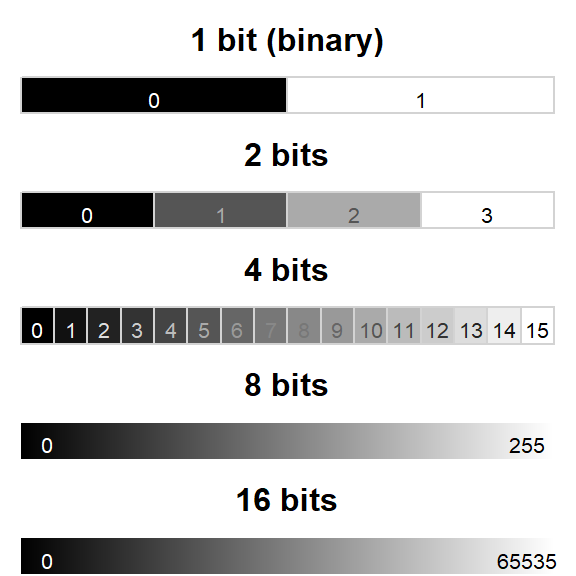

There is a wide range of raster file formats used in the GIS world. Some of the most popular ones are listed below.

### Imagine

The Imagine file format was originally created by an image processing software company called ERDAS. This file format consists of a single `.img` file. This is a simpler file format than the shapefile. It is sometimes accompanied by an `.xml` file which usually stores metadata information about the raster layer.

### GeoTiff

A popular public domain raster data format is the GeoTIFF format. If **maximum portability** and **platform independence** is important, this file format may be a good choice.

### File Geodatabase

A raster file can also be stored in a file geodatabase alongside vector files. Geodatabases have the benefit of **defining image mosaic structures** thus allowing the user to create “stitched” images from multiple image files stored in the geodatabase. Also, processing very large raster files can be computationally more efficient when stored in a file geodatabase as opposed to an Imagine or GeoTiff file format.

# Spatial Vector Data

## Intro to GeoPandas

The goal of GeoPandas is to make working with spatial data in Python easier. It combines the capabilities of pandas and shapely, providing spatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in Python that would otherwise require a spatial database such as PostGIS.

## Data Structures

GeoPandas implements two main data structures, a `GeoSeries` and a `GeoDataFrame`. These are subclasses of pandas Series and DataFrame, respectively.

### GeoSeries

A `GeoSeries` is essentially a vector where each entry in the vector is a set of shapes corresponding to one observation. An entry may consist of only one shape (like a single polygon) or multiple shapes that are meant to be thought of as one observation (like the many polygons that make up the State of Hawaii or a country like Indonesia).

geopandas has three basic classes of geometric objects (which are actually shapely objects):
- Points / Multi-Points
- Lines / Multi-Lines
- Polygons / Multi-Polygons

In [34]:
s = gpd.GeoSeries([Point(1, 1), Point(2, 2), Point(3, 3)])
s

0    POINT (1.00000 1.00000)
1    POINT (2.00000 2.00000)
2    POINT (3.00000 3.00000)
dtype: geometry

In [35]:
l = gpd.GeoSeries([LineString([Point(-77.03678, 38.907192), Point(-76.612190, 39.290386), Point(-77.4088456, 39.412006)])])
l

0    LINESTRING (-77.03678 38.90719, -76.61219 39.2...
dtype: geometry

In [37]:
p = gpd.GeoSeries([Polygon([(-77.03678, 38.907192), (-76.612190, 39.290386), (-77.4088456, 39.412006)])])
p

0    POLYGON ((-77.03678 38.90719, -76.61219 39.290...
dtype: geometry

Note that all entries in a GeoSeries **need not be of the same geometric type**, although **certain export operations will fail** if this is not the case.

### GeoDataFrame

A `GeoDataFrame` is a tabular data structure that contains a `GeoSeries`.

The most important property of a `GeoDataFrame` is that it always has one `GeoSeries` column that holds a special status. This `GeoSeries` is referred to as the `GeoDataFrame’s` “geometry”. When a spatial method is applied to a `GeoDataFrame` (or a spatial attribute like area is called), this commands will always act on the “geometry” column.

The “geometry” column – no matter its name – can be accessed through the geometry attribute (gdf.geometry), and the name of the geometry column can be found by typing gdf.geometry.name.

A `GeoDataFrame` may also contain other columns with geometrical (shapely) objects, but only one column can be the active geometry at a time. To change which column is the active geometry column, use the `GeoDataFrame.set_geometry()` method.

An example using the worlds `GeoDataFrame`:

In [50]:
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# world.head()

DriverError: c:\Users\gilramolete\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\datasets\naturalearth_lowres\naturalearth_lowres.shp: No such file or directory

In [51]:
# world.plot()

# Spatial Points Lines Polygon in Python

## Creating GeoDataFrame Geometries

A `GeoDataFrame` object is a `pandas.DataFrame` that has a column with geometry. An empty `GeoDataFrame` is just that, empty, essentially just like the pandas one. Let’s create an empty `GeoDataFrame` and create a new column called geometry that will contain our Shapely objects:

In [53]:
# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()
print(newdata)

Empty GeoDataFrame
Columns: []
Index: []


### GeoDataFrame Components

In order to have a working spatial dataframe we need to define a few things:
- data: a `pandas.DataFrame`, dictionary, or empty list [] containing an desired attribute data. Use [] if no data is used
- crs: Coordinate Reference System of the geometry objects. Can be anything accepted by `pyproj.CRS.from_user_input()`, such as an authority string (eg “EPSG:4326”) or a WKT string.
- geometry: Column name in a DataFrame to use as geometry or Shapely point, line, or polygon object.

Since geopandas takes advantage of Shapely geometric objects it is possible to create a Shapefile from a scratch by passing Shapely’s geometric objects into the GeoDataFrame. This is useful as it makes it easy to convert e.g. a text file that contains coordinates into a Shapefile.

Now we have a geometry column in our GeoDataFrame but we don’t have any data yet.

### Create Point from list of coordinates

Creating geopandas point objects is a snap! All we need is a **coordinate pair** from which we generate a Shapely point geometry object, we then **create a dictionary that holds that geometry and any attributes** we want, and a coordinate reference system. In this case we use a ESPG code.

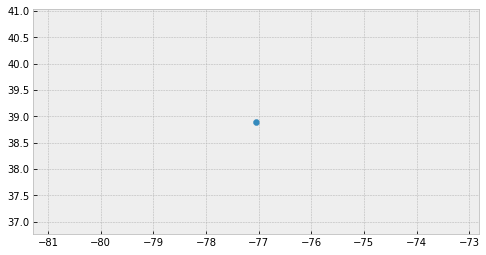

In [56]:
# Coordinates of the GW department of geography in Decimal Degrees
coordinate = [-77.04639494419096,  38.89934963421794]

# Create a Shapely point from a coordinate pair
point_coord = Point(coordinate)

# Create a dataframe with needed attributes and required geometry column
df = {
    'GWU': ['Dept Geography'],
    'geometry': [point_coord]
}

# Convert shapely object to a geodataframe
point = gpd.GeoDataFrame(df, geometry = 'geometry',)

fig, ax = plt.subplots(figsize = (8, 12))
point.plot(ax = ax)
plt.show()

We can apply the same process to a set of points stored in a pandas dataframe.

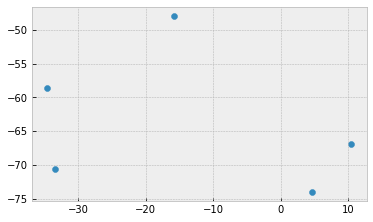

In [58]:
# list of attributes and coordinates
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'lat': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'lon': [-58.66, -47.91, -70.66, -74.08, -66.86]})

# Create a Shapely points from the coordinate-tuple list
ply_coord = [Point(x, y) for x, y in zip(df.lat, df.lon)]

# Convert shapely object to a geodataframe with a crs
poly = gpd.GeoDataFrame(df, geometry = ply_coord)

fig, ax = plt.subplots()
poly.plot(ax = ax)
plt.show()

### Creating Points from csv of latitude and longitude (lat, lon)

One of the most common data creation tasks is creating a shapefile from a list of points or a `.csv` file. Luckily getting this data into usable format is easy enough.

First we have to create an example `.csv` dataset to work from:

In [64]:
# Create an outline of Washington DC and write to csv
path_to_csv = os.getcwd() + r"/data/points.csv"
points = {'Corner':['N','E','S','W'],
          'lon': [-77.0412826538086, -77.11681365966797, -77.01896667480469, -77.0412826538086], 
          'lat': [38.99570671505043, 38.936713143230044, 38.807610542357594, 38.99570671505043]}

points = pd.DataFrame.from_dict(points)
points.to_csv(path_to_csv)

To create a `geodataframe` from our data you simply need to read it back in, an specify the geometry column values using `points_from_xy` pointing it to the correct columns of `df`, namely `df.lon` anf `df.lat`.

In [66]:
# Read the point data in
df = pd.read_csv(path_to_csv, index_col = 'Unnamed: 0')

# Create a geodataframe
points = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(x = df.lon, y = df.lat))
points

,Corner,lon,lat,geometry
0,N,-77.041283,38.995707,POINT (-77.04128 38.99571)
1,E,-77.116814,38.936713,POINT (-77.11681 38.93671)
2,S,-77.018967,38.807611,POINT (-77.01897 38.80761)
3,W,-77.041283,38.995707,POINT (-77.04128 38.99571)


In this case `points_from_xy()` was used to transform lat and lon into a list of `shapely.Point` objects. This then is used as the geometry for the `GeoDataFrame`. (`points_from_xy()` is simply an enhanced wrapper for [`Point(x, y) for x, y in zip(df.lon, df.lat)`])
- Although we say “lat lon”, python uses “lon lat” instead, this follows the preference for using x,y for notation.
- Typically, like the data above, these data are stored in WGS84 lat lon, but be sure to check this, another common format is UTM coordinates (look for values around 500,000 east to west and measured in meters)

### Creating Spatial Lines

Following the examples above we can specify lines easily. In this case, let’s say we have lines tracking three people riding their bikes through town. We keep track of their unique id `ID`, their location `X`, `Y`, and their `Speed`, and read in the data below:

In [71]:
data = """
ID,X,Y,Speed
1,  -87.789,  41.976,  16
1,  -87.482,  41.677,  17
2,  -87.739,  41.876,  16
2,  -87.681,  41.798,  16
2,  -87.599,  41.708,  16
3,  -87.599,  41.908,  17
3,  -87.598,  41.708,  17
3,  -87.643,  41.675,  17
"""

# use StringIO to read in text chunk
df = pd.read_table(StringIO(data), sep = ',')
df

,ID,X,Y,Speed
0,1,-87.789,41.976,16
1,1,-87.482,41.677,17
2,2,-87.739,41.876,16
3,2,-87.681,41.798,16
4,2,-87.599,41.708,16
5,3,-87.599,41.908,17
6,3,-87.598,41.708,17
7,3,-87.643,41.675,17


Let’s convert these to points and take a look. Notice that points are not a good replacement for lines in the case, we have three individuals, and they need to be treated separately.

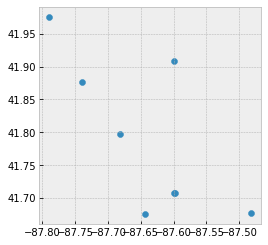

In [72]:
# Zip the coordinates into a point object and convert into a GeoDataFrame
points = [Point(xy) for xy in zip(df.X, df.Y)]
geo_df = gpd.GeoDataFrame(df, geometry = points)

fig, ax = plt.subplots()
geo_df.plot(ax = ax)
plt.show()

Now let’s tread these data as lines, we can take advantage of the column ID to `.groupby`. Luckily `geopandas.groupby` is consistent with the use in pandas. So here we `.groupby(['ID'])`, for each `ID` group we convert the values to a list, and store it in a Fiona `LineString` object.

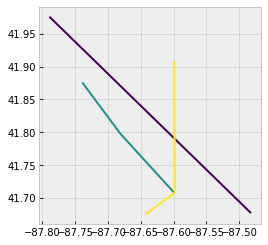

In [74]:
# Treat each ID group of points as a line
lines = geo_df.groupby(['ID'])['geometry'].apply(lambda x: LineString(x.tolist()))

# Store as a GeoDataFrame and add `ID` as a column (currently stored as the index)
lines = gpd.GeoDataFrame(lines, geometry = 'geometry')
lines.reset_index(inplace = True)

fig, ax = plt.subplots()
lines.plot(column = 'ID', ax = ax)
plt.show()

Now we can see that each line is treated separately by `ID`, and plot them using `.plot(column='ID')`.

### Creating Spatial Polygons

Creating a polyon in geopandas is very similiar to the other exercises. First we create a Fiona geometry object from our coordinates, add that to a dataframe with any attributes and then create a `GeoDataFrame` with an assigned coordinate reference system (CRS).

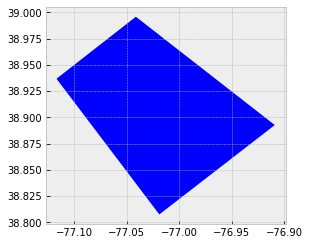

In [75]:
# list of coordindate pairs
coordinates = [[ -77.0412826538086, 38.99570671505043 ], [ -77.11681365966797, 38.936713143230044 ], [ -77.01896667480469, 38.807610542357594],
               [-76.90910339355469,  38.892636142310295]]

# Create a Shapely polygon from the coordinate-tuple list
ply_coord = Polygon(coordinates)

# Create a dictionary with needed attributes and required geometry column
df = {
    'Attribute': ['name1'],
    'geometry': ply_coord
}

# Convert shapely object to a GeoDataFrame
poly = gpd.GeoDataFrame(df, geometry = 'geometry')

fig, ax = plt.subplots()
poly.plot(ax = ax)
plt.show()

### Creating Spatial Points (the long way)

Since geopandas takes advantage of Shapely geometric objects it is possible to create a Shapefile from a scratch by passing Shapely’s geometric objects into the GeoDataFrame. This is useful as it makes it easy to convert e.g. a text file that contains coordinates into a Shapefile.

Let’s create an empty `GeoDataFrame` and create a new column called `geometry` that will contain our Shapely objects:

In [76]:
# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()

# Create a new column called `geometry` to the GeoDataFrame
newdata['geometry'] = None
print(newdata)

Empty GeoDataFrame
Columns: [geometry]
Index: []


Let’s create a Shapely Point representing the GWU Department of Geography that we can insert to our GeoDataFrame:

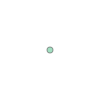

In [77]:
# Coordinates of the GW department of geography in Decimal Degrees
coordinates = (-77.04639494419096,  38.89934963421794)

# Create a Shapely polygon from the coordinate-tuple list
point = Point(coordinates)

# Let's see what we have
point

Okay, so now we have appropriate Polygon -object.

Let’s insert the polygon into our ‘geometry’ column in our GeoDataFrame:

In [78]:
# Insert the point into `geometry` column at index 0
newdata.loc[0, 'geometry'] = point
newdata

,geometry
0,POINT (-77.04639 38.89935)


Now we have a GeoDataFrame with Point that we can export to a Shapefile.

Let’s add another column to our GeoDataFrame called Location with text GWU Geography.

In [79]:
# Add a new column and insert data
newdata.loc[0, 'Location'] = 'GWU Geography'
newdata

,geometry,Location
0,POINT (-77.04639 38.89935),GWU Geography


Okay, now we have additional information that is useful to be able to recognize what the feature represents.

Before exporting the data it is useful to determine the **coordinate reference system **(CRS, ‘projection’) for the GeoDataFrame. GeoDataFrame has a property called `.crs` that shows the coordinate system of the data which is empty (None) in our case since we are creating the data from the scratch (e.g. `newdata.crs` returns `None`).

Let’s add a crs for our GeoDataFrame. A Python module called fiona has a nice function called from_epsg() for passing coordinate system for the GeoDataFrame. Next we will use that and determine the projection to WGS84 (epsg code: 4326) which is the most common choice for lat lon CRSs:

In [82]:
newdata.set_crs(epsg = 4326, inplace = True)
newdata.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Finally, we can export the data using GeoDataFrames .to_file() -function. The function works similarly as numpy or pandas, but here we only need to provide the output path for the Shapefile. Easy isn’t it!:

In [84]:
# Determine the output path for the Shapefile
outfp = os.getcwd() + r'/data/gwu_geog.shp'

# Write the data into that Shapefile
newdata.to_file(outfp)

# Spatial Raster Data in Python

A raster data model uses an **array of cells, or pixels**, to represent real-world objects. Raster datasets are commonly used for **representing and managing imagery, surface temperatures, digital elevation models, and numerous other entities**. A raster can be thought of as a special case of an area object where **the area is divided into a regular grid of cells**. But a **regularly spaced array of marked points** may be a better analogy since rasters are stored as an array of values where each cell is defined by a single coordinate pair inside of most GIS environments. Implicit in a raster data model is a value associated with each cell or pixel. This is in contrast to a vector model that may or may not have a value associated with the geometric primitive.

In order to work with raster data we will be using `rasterio` and later `geowombat`. Behind the scenes, a `numpy.ndarray` does all the heavy lifting. To understand how raster works it helps to construct one from scratch.

Here we create two `ndarray` objects one `X` spans [-90°, 90°] longitude, and `Y` covers [-90°, 90°] latitude.

In [85]:
x = np.linspace(-90, 90, 6)
y = np.linspace(90, -90, 6)
X, Y = np.meshgrid(x, y)
X

array([[-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.]])

In [86]:
Y

array([[ 90.,  90.,  90.,  90.,  90.,  90.],
       [ 54.,  54.,  54.,  54.,  54.,  54.],
       [ 18.,  18.,  18.,  18.,  18.,  18.],
       [-18., -18., -18., -18., -18., -18.],
       [-54., -54., -54., -54., -54., -54.],
       [-90., -90., -90., -90., -90., -90.]])

Let's generate some data representing temperature and store it an array `z`.

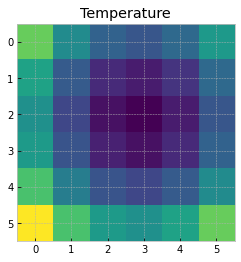

In [87]:
Z1 = np.abs(((X - 10) ** 2 + (Y - 10) ** 2) / 1 ** 2)
Z2 = np.abs(((X + 10) ** 2 + (Y + 10) ** 2) / 2.5 ** 2)
Z = (Z1 - Z2)

plt.imshow(Z)
plt.title("Temperature")
plt.show()

Note that `Z` *contains no data on its location*. Its just an array, the information stored in `x` and `y` aren’t associated with it at all. This location data will often be stored in the header of file. In order to ‘locate’ the array on the map we will use affine transformations.

## Assigning spatial data to an array in python

We have an array of data and some coordinates for each cell, but how do we create a spatial dataset from it? In order to do this we need three components:
1. An **array of data** and typically the **xy coordinates**
2. A **coordinate reference system** which defines what coordinate space we are using (e.g. degrees or meters, where is the prime meridian, etc.)
3. A **transform** defining the **coordinate of the upper left hand corner** and the **cell resolution**

Once you have those components you can write out a working spatial raster dataset in python in a few lines of code. We just need to provide the information listed above in a format that rasterio understands.

In [90]:
res = (x[-1] - x[0]) / 240.0
transform = Affine.translation(x[0] - res / 2, y[0] - res / 2) * Affine.scale(res, res)

# Open in `write` mode, unpack profile into to dst
with rio.open(
    os.getcwd() + r'/data/new_raster.tif',
    'w',
    driver = 'GTIFF',       # Output file type
    height = Z.shape[0],    # Shape of array
    width = Z.shape[1],
    count = 1,              # Number of bands
    dtype = Z.dtype,        # Output datatype
    crs = '+proj=latlong',  # CRS
    transform = transform,  # Location and resolution of upper left cell
) as dst:
    # Check for number of bands
    if dst.count == 1:
        # Write single band
        dst.write(Z, 1)
    else:
        # Write each band individually
        for band in range(len(Z)):
            # Write data, band # (strating from 1)
            dst.write(Z[band], band + 1)

Raster data is often ‘multiband’ (e.g. red, green, blue), so I provided code that works for both multiband and single band data.

If you are storing multiband data the dimensions should be stored as (band, y, x).